## Regresiíon Logistica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn

Cargamos el dataset y lo convertimos en un DataFrame. Vamos a utilizar un dataset conocido, el de las flores de iris.


In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris['data'],columns = iris['feature_names'])
df_iris['target'] = iris['target']

# Here, I have selected only two classes 0 and 1
df_iris = df_iris[df_iris.target != 2]

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


Creamos el modelo

In [3]:
iris_model = LogisticRegression(max_iter=1000)

Construimos nuestro X e Y

In [4]:
X = df_iris.iloc[:,[0,1]]
y = df_iris['target']

X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


Al igual que con la regresión lineal, vamos a separar el dataset para el entrenamiento

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [6]:
iris_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
iris_model.intercept_, iris_model.coef_

(array([-6.28967787]), array([[ 2.691177  , -2.66195151]]))

In [8]:
weights = [iris_model.intercept_[0],iris_model.coef_[0,0],iris_model.coef_[0,1]]

### Plotting the Decision Boundary


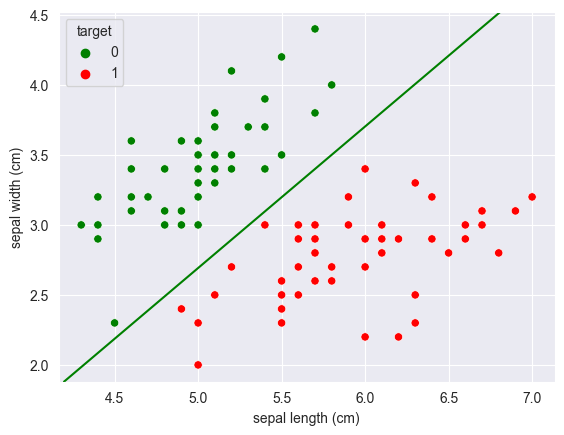

In [9]:
g =sn.scatterplot(x="sepal length (cm)",y="sepal width (cm)",
              hue="target",
              data=df_iris,palette=['green','red']);

x1 = (-weights[0] - weights[2] * df_iris.iloc[0,1])/weights[1]
x2 = (-weights[0] - weights[2] * df_iris.iloc[4,1])/weights[1]

plt.axline((x1, df_iris.iloc[0,1]), (x2, df_iris.iloc[4,1]), color = "green")
